In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
import pyarabic.araby as araby


In [2]:
df = pd.read_csv(r'C:\Users\midom\OneDrive\Desktop\aim tech\1_retrieved_data.csv')

In [3]:
df.head()

,Unnamed: 0,id_original_df,dialect,id_retrieved_df,text
0,0,1175358310087892992,IQ,1175358310087892992,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1,1175416117793349632,IQ,1175416117793349632,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,2,1175450108898565888,IQ,1175450108898565888,@KanaanRema مبين من كلامه خليجي
3,3,1175471073770573824,IQ,1175471073770573824,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,4,1175496913145217024,IQ,1175496913145217024,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺


In [4]:
len(df[df.duplicated()])

0

<AxesSubplot:xlabel='dialect', ylabel='count'>

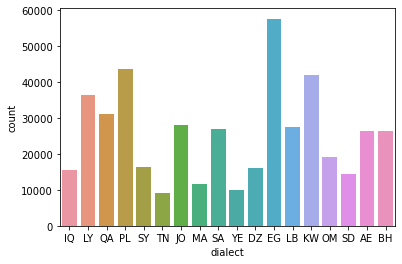

In [5]:
sns.countplot(data = df, x = 'dialect')

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\midom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\midom\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords

stopwords_list = stopwords.words('arabic')

In [9]:
#this function is for remove emojis
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text) 

text = '@hmo2406 وين هل الغيبه اخ محمد 🌸🌺'
print(deEmojify(text))

@hmo2406 وين هل الغيبه اخ محمد 


In [75]:
def Preprocessing(text):
    
    # removing emojis
    text = deEmojify(text)  
    
    # some hashtags have important words so i tried to clean them 
    hashing = []
    for i in text.split():
        if i.startswith('#')==True:
            hashing.append(i.strip('#').replace('_', ' ').strip())
        else:
            hashing.append(i)
        text = ' '.join(hashing)
        
    # removing all usernames that starts with "@"
    text = ' '.join(word for word in text.split() if word.startswith('@')!=True) 
    
    # removing all urls that starts with "https"
    text = ' '.join(word for word in text.split() if word.startswith('https')!=True) 
    
    # removing all space and "\n"
    text = text.replace('\n', ' ')
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    
    # some words have tashkeel(diacritics) so i tried to remove them with "pyarabic" library
    text = araby.strip_diacritics(text)
    
    # remove any non-alphapetic tokens
    words = nltk.word_tokenize(text)
    new_text= ' '.join([word for word in words if word.isalpha()])
    
    # some sentences are seen as one token because they need to be splited with '،' 
    new_text = new_text.split('،')
    new_text= ' '.join([word for word in words if word.isalpha()])
    
    # remove any space at the start and the end of a sentence
    new_text = new_text.strip()
    
    # check if there are any words with uppercase to convert them to lowercase
    new_text = new_text.lower()
    
    return new_text



In [76]:
preprocessed_texts = []
for i in df['text']:
    preprocessed_texts.append(Preprocessing(i))

In [77]:
df['preprocessed_text'] = preprocessed_texts

In [78]:
df.head()

,Unnamed: 0,id_original_df,dialect,id_retrieved_df,text,preprocessed_text
0,0,1175358310087892992,IQ,1175358310087892992,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,لكن بالنهاية ينتفض يغير
1,1,1175416117793349632,IQ,1175416117793349632,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,يعني هذا محسوب على البشر حيونه ووحشيه وتطلبون ...
2,2,1175450108898565888,IQ,1175450108898565888,@KanaanRema مبين من كلامه خليجي,مبين من كلامه خليجي
3,3,1175471073770573824,IQ,1175471073770573824,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,يسلملي مرورك وروحك الحلوه
4,4,1175496913145217024,IQ,1175496913145217024,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,وين هل الغيبه اخ محمد


In [79]:
df.isnull().sum()

Unnamed: 0           0
id_original_df       0
dialect              0
id_retrieved_df      0
text                 0
preprocessed_text    0
dtype: int64

### Now let's see how the output looks like

In [80]:
df.preprocessed_text[1]

'يعني هذا محسوب على البشر حيونه ووحشيه وتطلبون من الغرب يحترمكم ويؤمن بدينكم ولاينعتكم بالإرهاب'

In [81]:
df.text[1]

'@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. حيونه ووحشيه .. وتطلبون من الغرب يحترمكم ويؤمن بدينكم ولاينعتكم بالإرهاب ..'

In [83]:
df.isnull().sum()

Unnamed: 0           0
id_original_df       0
dialect              0
id_retrieved_df      0
text                 0
preprocessed_text    0
dtype: int64

In [84]:
len(df[df['preprocessed_text'] == ""])

0

In [85]:
df[df['preprocessed_text'] == ""]

,Unnamed: 0,id_original_df,dialect,id_retrieved_df,text,preprocessed_text


In [86]:
df = df[df['preprocessed_text'] != ""]

### let's also check if there are any sentence with length lower than 3 words to remove it

In [87]:
len(df[df['preprocessed_text'].str.split().str.len() < 3])

0

In [88]:
df.shape

(453232, 6)

In [89]:
df = df[df['preprocessed_text'].str.split().str.len() > 2]

In [90]:
df.shape

(453232, 6)

In [91]:
df[df['preprocessed_text'].str.split().str.len() < 4]

,Unnamed: 0,id_original_df,dialect,id_retrieved_df,text,preprocessed_text
26,26,1154854668780154880,IQ,1154854668780154880,@yyyy43513689 بالمنصور محمدنه ياخذ سلڤيات🤨,بالمنصور محمدنه ياخذ
51,51,1160290300868382720,IQ,1160290300868382720,@Aber04631655 عيدك مبارك صحه وسلامه🤲🌹,عيدك مبارك صحه
155,155,1145069624054206464,IQ,1145069624054206464,@hanash_22 @Enpersoon سلملي عليها گلها ماعدنه☺️😉,سلملي عليها گلها
253,253,1133033721035141248,IQ,1133033721035141248,@Marwan79j @Abnalsdr_313 هسه عرفت ليش ماعلقت؟؟؟؟,هسه عرفت ليش
2498,2498,1045637028560490368,IQ,1045637028560490368,@matax94 شفت الفراغ شنو يسوي؟,شفت الفراغ شنو
...,...,...,...,...,...,...
455654,455654,229023529360834560,BH,229023529360834560,مفــنود وانا اموت فيك؛,مفــنود وانا اموت
455918,455918,998311513659129984,BH,998311513659129984,@sawsanomoush18 🤣🤣🤣وهو يمكن شكله قرد,يمكن شكله قرد
456002,456002,933623319819096064,BH,933623319819096064,🤣😜ترا انا وحده منهم https://t.co/8AmZ5vwXTg,انا وحده منهم
456567,456567,1048215299647065984,BH,1048215299647065984,@Maryam98131842 شلون تختارين اللي ينيكش؟,شلون تختارين اللي


### so the lowest sentence length is 3, that's good

In [94]:
df.to_csv(r'C:\Users\midom\OneDrive\Desktop\aim tech\2_preprocessed_data.csv')

In [95]:
testing = pd.read_csv(r'C:\Users\midom\OneDrive\Desktop\aim tech\2_preprocessed_data.csv')

In [96]:
testing.head()

,Unnamed: 0,Unnamed: 0.1,id_original_df,dialect,id_retrieved_df,text,preprocessed_text
0,0,0,1175358310087892992,IQ,1175358310087892992,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,لكن بالنهاية ينتفض يغير
1,1,1,1175416117793349632,IQ,1175416117793349632,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,يعني هذا محسوب على البشر حيونه ووحشيه وتطلبون ...
2,2,2,1175450108898565888,IQ,1175450108898565888,@KanaanRema مبين من كلامه خليجي,مبين من كلامه خليجي
3,3,3,1175471073770573824,IQ,1175471073770573824,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,يسلملي مرورك وروحك الحلوه
4,4,4,1175496913145217024,IQ,1175496913145217024,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,وين هل الغيبه اخ محمد


In [97]:
testing.isnull().sum()

Unnamed: 0           0
Unnamed: 0.1         0
id_original_df       0
dialect              0
id_retrieved_df      0
text                 0
preprocessed_text    0
dtype: int64

In [98]:
testing[testing['preprocessed_text'] == ""]

,Unnamed: 0,Unnamed: 0.1,id_original_df,dialect,id_retrieved_df,text,preprocessed_text
